In [1]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
# read the files into a dataframe
df= pd.read_csv('vif_standardised_values.csv')

In [3]:
df.head()

,GS,G,Assist_Pct,Usage_Pct,DRtg,Rising_Star
0,-0.697077,-0.697992,-0.963125,-0.370282,-0.916925,0
1,-0.652427,0.424656,0.994419,0.471879,-0.278111,0
2,2.964228,1.707684,1.159983,0.967269,0.360703,0
3,1.044275,1.159724,-0.310611,0.042542,0.147765,0
4,-0.697077,-0.297046,-0.300871,-0.568438,-0.916925,0


In [4]:

features="+".join(df.columns)

print(features)

GS+G+Assist_Pct+Usage_Pct+DRtg+Rising_Star


In [5]:
# Using Variance Inflation Factor
y,X = dmatrices('Rising_Star~ GS+G+Assist_Pct+Usage_Pct+DRtg',df,return_type='dataframe')

In [6]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif.round(1)

,VIF Factor,Features
0,1.0,Intercept
1,2.3,GS
2,2.1,G
3,1.2,Assist_Pct
4,1.3,Usage_Pct
5,1.0,DRtg


In [7]:
# Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing
x = df.drop('Rising_Star', axis=1)
y = df['Rising_Star']

# Split the data into 75% & 25%  and fit the mmodel
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

# print the classification Report
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       255
           1       0.67      0.82      0.74        17

    accuracy                           0.96       272
   macro avg       0.83      0.90      0.86       272
weighted avg       0.97      0.96      0.97       272

[[248   7]
 [  3  14]]
0.9632352941176471


In [8]:
# check for P-values
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.622344
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -1.328   
Dependent Variable: Rising_Star      AIC:              1364.2212
Date:               2020-06-08 17:38 BIC:              1389.1817
No. Observations:   1088             Log-Likelihood:   -677.11  
Df Model:           4                LL-Null:          -290.83  
Df Residuals:       1083             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
GS            0.8905    0.1119   7.9583  0.0000   0.6712   1.1099
G            -0.2594    0.0928  -2.7940  0.0052  -0.4414  -0.0774
Assist_P

In [66]:
#### penalty = l1 regression or Lasso Regression
# l1 regression
logmodel=LogisticRegression(penalty='l1',solver='liblinear')
logmodel.fit(x_train,y_train)

predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       255
           1       0.67      0.82      0.74        17

    accuracy                           0.96       272
   macro avg       0.83      0.90      0.86       272
weighted avg       0.97      0.96      0.97       272

[[248   7]
 [  3  14]]
0.9632352941176471


In [67]:
# l2 regression Ridge Regression
logmodel=LogisticRegression(penalty='l2',solver='liblinear')
logmodel.fit(x_train,y_train)

predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       255
           1       0.70      0.82      0.76        17

    accuracy                           0.97       272
   macro avg       0.84      0.90      0.87       272
weighted avg       0.97      0.97      0.97       272

[[249   6]
 [  3  14]]
0.9669117647058824


In [11]:
# Plotting AUC- ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


In [12]:
# generate a no skill prediction( for the majority class)
ns_prob = [0 for _ in range(len(y_test))]

# predict the probabilities
lr_prob= logmodel.predict_proba(x_test)

# keep the probabilities for positive outcomes only
lr_prob = lr_prob[:,1]


In [13]:
# calculate the scores 
ns_auc = roc_auc_score(y_test,ns_prob)
lr_auc = roc_auc_score(y_test,lr_prob)


In [14]:
# summarize the scores
print('Not a star: ROC AUC= %.3f'%(ns_auc))
print('Logistic: ROC AUC= %.3f'%(lr_auc))


Not a star: ROC AUC= 0.500
Logistic: ROC AUC= 0.989


In [15]:
# calculate the roc curvers
ns_fpr,ns_tpr,_ = roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_ = roc_curve(y_test,lr_prob)

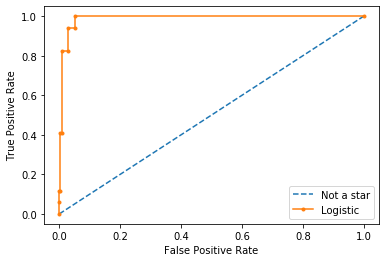

In [16]:
# plot the curve for the model
from matplotlib import pyplot
pyplot.plot(ns_fpr,ns_tpr,linestyle='--',label='Not a star')
pyplot.plot(lr_fpr,lr_tpr,marker='.',label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()